# 클러스터링
- K = 4 클러스터링
- 클러스터링별 특징 요약 및 인사이트 서술

In [4]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

X, y = make_blobs(n_samples=500, centers = 4, cluster_std = 1.0, random_state = 42)

user_df = pd.DataFrame(X, columns = ['feature1','feature2'])
user_df['feature3'] = np.random.randint(10, 300, size = 500)

print(user_df.head())

   feature1  feature2  feature3
0 -7.689054  6.620346       220
1 -9.576514 -6.934404       118
2  6.829682  1.164871       295
3 -2.901306  7.550771       271
4 -5.678413 -7.288185        69


## 풀이
- standardscaler로 정규화 후 kmeans 클러스터링(다른 것들도 해보기)
- 클러스터별 평균 feature 값 요약
- 집단별 마케팅 전략 제안

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(user_df)

# k-means
kmeans = KMeans(n_clusters=4, random_state=42)
user_df['cluster'] = kmeans.fit_predict(X_scaled)

# 클러스터별 평균 요약
cluster_summary = user_df.groupby('cluster').mean()

print(cluster_summary)

         feature1  feature2  feature3
cluster                              
0        4.721825  1.923856   160.584
1       -7.000965 -6.904458   154.576
2       -5.300997  8.376705   232.296
3       -5.982756  8.171183    88.704


c:\Users\jun99\OneDrive - 계명대학교\바탕 화면\Analysis\분석 연습\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=2025, 
                                                    shuffle=True, stratify=False)

In [ ]:
# Standard scailing
from sklearn.preprocessing import StandardScaler

stscaler = StandardScaler()

x_train_stsca = pd.DataFrame(stscaler.fit_transform(x_train))
x_test_stsca = pd.DataFrame(stscaler.transform(x_test))

In [ ]:
# MinMAx
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()

x_train_mms = pd.DataFrame(mmscaler.fit_transform(x_trin))
x_test_mms = pd.DataFrame(mmscaler.transform(x_test))

In [ ]:
# Robust
from sklearn.preprocessing import RobustScaler

robscaler = RobustScaler()

x_train_rb = pd.DataFrame

# 통계 검정

# A/B Test
group: A(기존 서비스)/ B(신규 서비스)
conversion: 구매 여부(1/0)

검정을 통해 신규 서비스가 통계적으로 유의미하게 전환율을 높였는지 확인하기

In [8]:
np.random.seed(42)

ab_test_df = pd.DataFrame({
    'group': np.random.choice(['A', 'B'], size=1000),
    'conversion': np.random.binomial(1, p=0.1, size=1000)
})

# B그룹 전환율 약간 높임
ab_test_df.loc[ab_test_df['group'] == 'B', 'conversion'] = np.random.binomial(
    1, p=0.13, size=(ab_test_df['group'] == 'B').sum())

print(ab_test_df['group'].value_counts())
print(ab_test_df.head())


group
B    510
A    490
Name: count, dtype: int64
  group  conversion
0     A           0
1     B           0
2     A           0
3     A           0
4     A           0


## 풀이
- 카이제곱 수행 또는 proportion test 수행
- p-value 해석 및 결론

In [10]:
import scipy.stats as stats

# 교차표
contingency = pd.crosstab(ab_test_df['group'], ab_test_df['conversion'])

print(contingency)

# 카이제곱 테스트
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print(f"Chi2 Statistic: {chi2:.4f}, p-value: {p:.4f}")
print(stats.chi2_contingency(contingency))

conversion    0   1
group              
A           444  46
B           452  58
Chi2 Statistic: 0.8542, p-value: 0.3554
Chi2ContingencyResult(statistic=np.float64(0.8542050061782949), pvalue=np.float64(0.35536547727292633), dof=1, expected_freq=array([[439.04,  50.96],
       [456.96,  53.04]]))


Custom threshold (0.3) 적용 후 예측값: [1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0
 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0
 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1
 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0
 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0
 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0
 0 1 0 1]


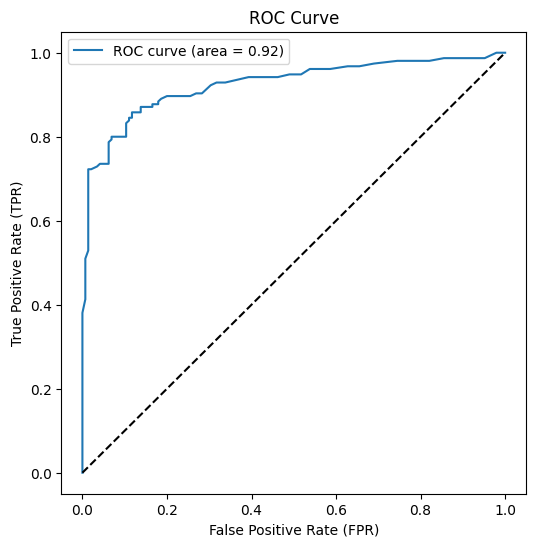

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# 데이터 생성
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 학습
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 확률 예측
y_pred_proba = model.predict_proba(X_test)[:,1]  # 클래스 1의 확률만 가져오기

# 1. threshold 조정 (예: 0.3)
threshold = 0.3
y_pred_custom = (y_pred_proba >= threshold).astype(int)

print("Custom threshold (0.3) 적용 후 예측값:", y_pred_custom)

# 2. ROC Curve 그리기
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--')  # 랜덤 예측선
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()


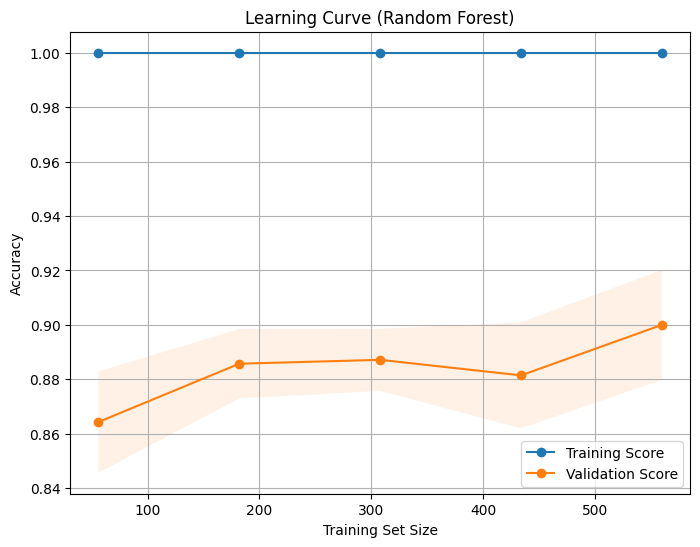

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 생성
model = RandomForestClassifier(random_state=42)

# 학습 곡선 계산
train_sizes, train_scores, valid_scores = learning_curve(
    model, X_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# 평균과 표준편차 계산
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# 그래프 그리기
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Score')
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1)

plt.plot(train_sizes, valid_mean, 'o-', label='Validation Score')
plt.fill_between(train_sizes, valid_mean-valid_std, valid_mean+valid_std, alpha=0.1)

plt.title('Learning Curve (Random Forest)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


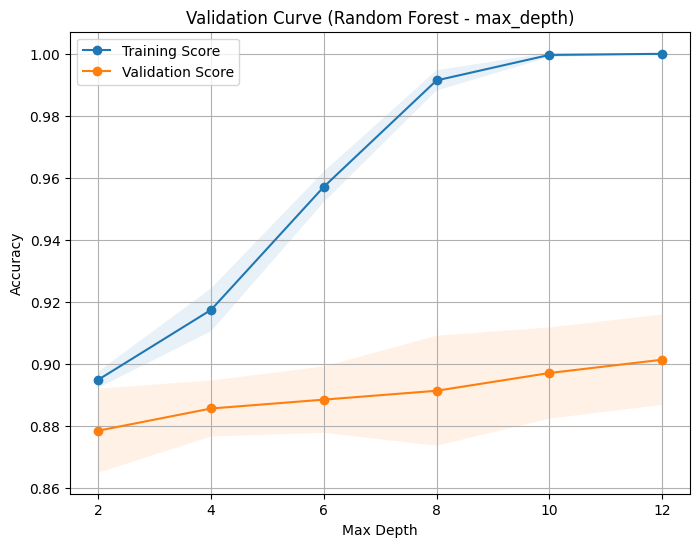

In [5]:
from sklearn.model_selection import validation_curve

# 검증 곡선 계산
param_range = [2, 4, 6, 8, 10, 12]

train_scores, valid_scores = validation_curve(
    RandomForestClassifier(random_state=42),
    X_train, y_train,
    param_name='max_depth',
    param_range=param_range,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# 평균과 표준편차 계산
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# 그래프 그리기
plt.figure(figsize=(8,6))
plt.plot(param_range, train_mean, 'o-', label='Training Score')
plt.fill_between(param_range, train_mean-train_std, train_mean+train_std, alpha=0.1)

plt.plot(param_range, valid_mean, 'o-', label='Validation Score')
plt.fill_between(param_range, valid_mean-valid_std, valid_mean+valid_std, alpha=0.1)

plt.title('Validation Curve (Random Forest - max_depth)')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


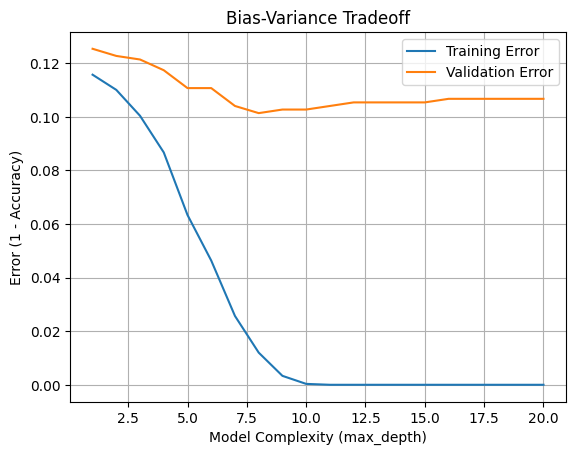

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier

# 데이터 준비
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 모델 복잡도 변화에 따른 검증곡선
param_range = np.arange(1, 21)
train_scores, valid_scores = validation_curve(
    RandomForestClassifier(random_state=42),
    X_train, y_train,
    param_name="max_depth",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

train_mean = 1 - np.mean(train_scores, axis=1)  # 1 - Accuracy = Error
valid_mean = 1 - np.mean(valid_scores, axis=1)

# 그래프
plt.plot(param_range, train_mean, label="Training Error")
plt.plot(param_range, valid_mean, label="Validation Error")
plt.title('Bias-Variance Tradeoff')
plt.xlabel('Model Complexity (max_depth)')
plt.ylabel('Error (1 - Accuracy)')
plt.legend()
plt.grid()
plt.show()
